In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [6]:
#call vgg model
vgg_model =  VGG16(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False

553467096/553467096 [==============================] - 31s 0us/step


In [7]:
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)

model.add(Dense(4, activation='softmax'))

In [8]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 10,
                                    fill_mode='nearest',
                                    vertical_flip=True,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    brightness_range=(0.4,0.6),
                                    horizontal_flip=True,
                                    validation_split=0.3)

In [10]:
path = '/content/drive/MyDrive/data'
train_generator=train_datagen.flow_from_directory(path,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training')

Found 2913 images belonging to 2 classes.


In [11]:
test_generator=train_datagen.flow_from_directory(path,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  subset='validation')

Found 1248 images belonging to 2 classes.


In [12]:
dataset=image_dataset_from_directory(path,
                                    image_size=(224,224),
                                    batch_size=32,
                                    shuffle=True
                                    )

Found 4161 files belonging to 2 classes.


In [13]:
class_name = dataset.class_names
class_name

['non_tropical', 'tropical_forest']

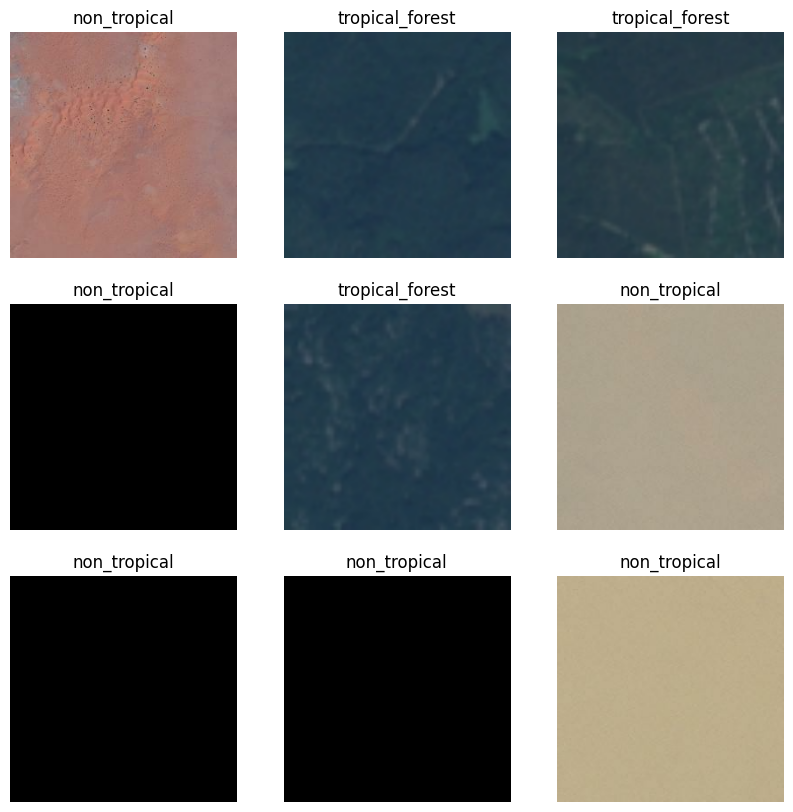

In [ ]:
plt.figure(figsize=(10, 10))
for image, label in dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[label[i]])
        plt.axis('off')

In [14]:
FIT = model.fit(train_generator, validation_data=test_generator, callbacks=[early], epochs=50)

Epoch 1/50
92/92 [==============================] - 1899s 20s/step - loss: 0.6515 - accuracy: 0.6584 - val_loss: 0.5509 - val_accuracy: 0.6394
Epoch 2/50
92/92 [==============================] - 68s 738ms/step - loss: 0.5697 - accuracy: 0.6993 - val_loss: 0.4830 - val_accuracy: 0.9728
Epoch 3/50
92/92 [==============================] - 69s 751ms/step - loss: 0.5348 - accuracy: 0.7333 - val_loss: 0.4032 - val_accuracy: 0.9527
Epoch 4/50
92/92 [==============================] - 68s 742ms/step - loss: 0.4495 - accuracy: 0.8170 - val_loss: 0.3897 - val_accuracy: 0.9688
Epoch 5/50
92/92 [==============================] - 69s 749ms/step - loss: 0.4002 - accuracy: 0.8761 - val_loss: 0.3403 - val_accuracy: 0.9720
Epoch 6/50
92/92 [==============================] - 68s 743ms/step - loss: 0.3620 - accuracy: 0.9303 - val_loss: 0.2819 - val_accuracy: 0.9736
Epoch 7/50
92/92 [==============================] - 69s 753ms/step - loss: 0.3567 - accuracy: 0.8816 - val_loss: 0.2540 - val_accuracy: 0.9744

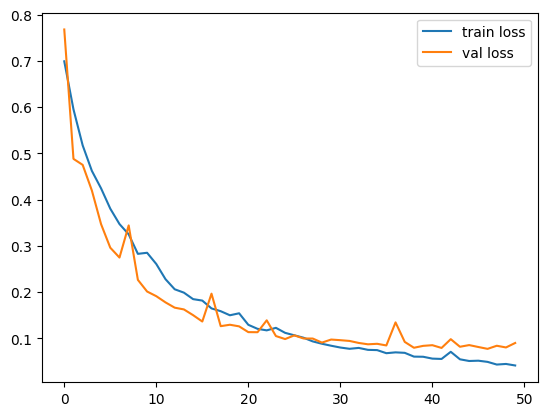

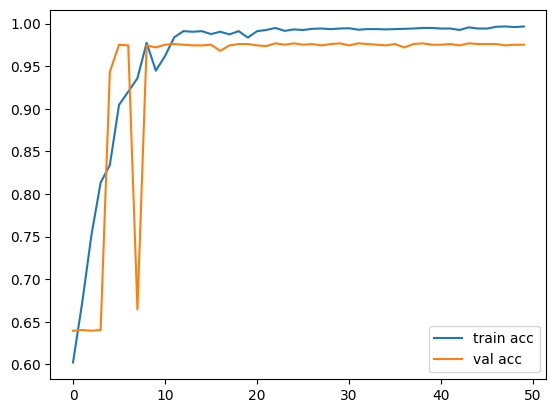

In [ ]:
plt.plot(FIT.history['loss'], label='train loss')
plt.plot(FIT.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(FIT.history['accuracy'], label='train acc')
plt.plot(FIT.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [15]:
y_true = np.array([])
y_pred = np.array([])
i = 0
for data, labels in test_generator:
    i = i + 1
    y = np.argmax(model.predict(data), axis=1)
    
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, y)
    
    if i == test_generator.samples // 32 + 1: break

1/1 [==============================] - 0s 28ms/step


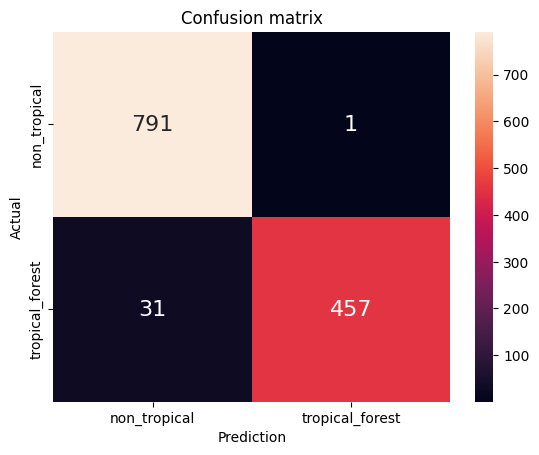

In [ ]:
from sklearn import metrics
cm =metrics.confusion_matrix(y_pred, y_true)
labels = class_name
df_cm = pd.DataFrame( cm,index=[i for i in range(2)], columns=[i for i in range(2)])
sns.heatmap(df_cm, annot=True, annot_kws={"size":16}, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
acc = accuracy_score(y_true, y_pred)
print("VGG 16 Model Accuracy: {:.2f}%".format(acc * 100))
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

VGG 16 Model Accuracy: 97.58%
Precision = 0.9409368635437881
Recall = 0.9956896551724138
F1 Score = 0.9675392670157068


In [16]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_true)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9680609308710725

Text(0.5, 0, 'False Positive Rate')

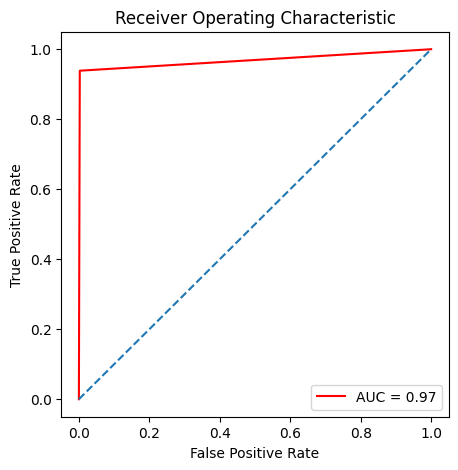

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')